In [1]:
# #!/usr/bin/python


# print("checking for nltk")
# try:
#     import nltk
# except ImportError:
#     print("you should install nltk before continuing")

# print("checking for numpy")
# try:
#     import numpy
# except ImportError:
#     print("you should install numpy before continuing")

# print ("checking for scipy")
# try:
#     import scipy
# except:
#     print("you should install scipy before continuing")

# print ("checking for sklearn")
# try:
#     import sklearn
# except:
#     print ("you should install sklearn before continuing")

# # print
# # print "downloading the Enron dataset (this may take a while)"
# # print "to check on progress, you can cd up one level, then execute <ls -lthr>"
# # print "Erron dataset should be last item on the list, along with its current size"
# # print "download will complete at about 423 MB"
# import urllib.request
# url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tgz"
# urllib.request.urlretrieve(url, filename="../enron_mail_20150507.tgz") 
# print ("download complete!")


# print
# print("unzipping Enron dataset (this may take a while)")
# import tarfile
# import os
# os.chdir("..")
# tfile = tarfile.open("enron_mail_20150507.tgz", "r:gz")
# tfile.extractall(".")

# print("you're ready to go!")


In [2]:
#!/usr/bin/python
import sys
from time import time
sys.path.append("../Documents/ud120-projects-master/tools/")

features_train, features_test, labels_train, labels_test = preprocess()
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
y_predict = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test,y_predict))

no. of Chris training emails: 4406
no. of Sara training emails: 4383
0.972693139151


In [27]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test



In [25]:
#!/usr/bin/python

import pickle
import _pickle as cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

def preprocess(words_file = "../Documents/ud120-projects-master/tools/word_data.pkl", authors_file="../Documents/ud120-projects-master/tools/email_authors.pkl"):
    
    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "rb")
    word_data = cPickle.load(words_file_handler)
    words_file_handler.close()

    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state = 42)

    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)

    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [3]:
#!/usr/bin/python
import sys
from time import time
sys.path.append("../Documents/ud120-projects-master/tools/")

features_train, features_test, labels_train, labels_test = preprocess()
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(features_train, labels_train)
y_predict = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test,y_predict))

no. of Chris training emails: 4406
no. of Sara training emails: 4383
0.981226533166


In [10]:
#!/usr/bin/python
import sys
from time import time
sys.path.append("../Documents/ud120-projects-master/tools/")

features_train, features_test, labels_train, labels_test = preprocess()
features_train = features_train[:int(len(features_train)/100)] 
labels_train = labels_train[:int(len(labels_train)/100)] 
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=10000)
clf.fit(features_train, labels_train)
y_predict = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict,labels_test))

no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.892491467577


In [11]:
import sys
from time import time
sys.path.append("../Documents/ud120-projects-master/tools/")

features_train, features_test, labels_train, labels_test = preprocess()
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=10000)
clf.fit(features_train, labels_train)
y_predict = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict,labels_test))

no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.990898748578


In [13]:
y_predict[26]

0

In [15]:
y_predict[50]

1

In [16]:
y_predict[100]

0

In [18]:
y_predict[10]

1

In [20]:
sum(y_predict==1)

877

In [21]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)







#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())
def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train, labels_train)
    
    
    return clf

ImportError: No module named 'class_vis'

In [5]:
import math
0.6667*math.log(0.6667,2) + 0.333*math.log(0.333,2)

-0.9182195787516174

In [6]:
1- 3*.9184/4

0.31120000000000003

In [ ]:
Decision Tree Mini Project

In this project, we will again try to classify emails, this time using a decision tree.   The starter code is in decision_tree/dt_author_id.py.

Part 1: Get the Decision Tree Running
Get the decision tree up and running as a classifier, setting min_samples_split=40.  It will probably take a while to train.  What’s the accuracy?

Part 2: Speed It Up
You found in the SVM mini-project that the parameter tune can significantly speed up the training time of a machine learning algorithm.  A general rule is that the parameters can tune the complexity of the algorithm, with more complex algorithms generally running more slowly.  

Another way to control the complexity of an algorithm is via the number of features that you use in training/testing.  The more features the algorithm has available, the more potential there is for a complex fit.  We will explore this in detail in the “Feature Selection” lesson, but you’ll get a sneak preview now.

find the number of features in your data.  The data is organized into a numpy array where the number of rows is the number of data points and the number of columns is the number of features; so to extract this number, use a line of code like len(features_train[0])
go into tools/email_preprocess.py, and find the line of code that looks like this:     selector = SelectPercentile(f_classif, percentile=1)  Change percentile from 10 to 1.
What’s the number of features now?
What do you think SelectPercentile is doing?  Would a large value for percentile lead to a more complex or less complex decision tree, all other things being equal?
Note the difference in training time depending on the number of features.  
What’s the accuracy when percentile = 1?







In [15]:
import sys
from time import time
sys.path.append("../Documents/ud120-projects-master/tools/")

features_train, features_test, labels_train, labels_test = preprocess()
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
y_predict = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict,labels_test))

no. of Chris training emails: 7936
no. of Sara training emails: 7884
0.967007963595


In [14]:
len(features_train[0])

379

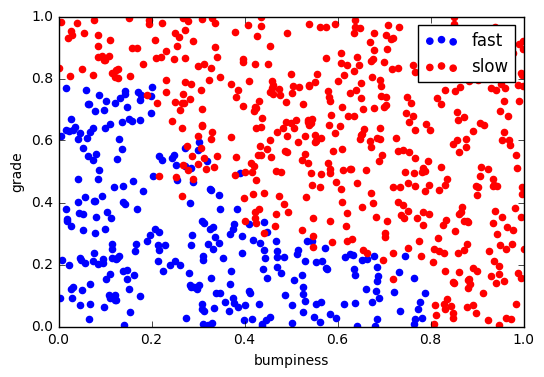

0.92


In [33]:
#!/usr/bin/python

import matplotlib.pyplot as plt
#from prep_terrain_data import makeTerrainData

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_train, labels_train)
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,labels_test))







In [1]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle





In [2]:
enron_data = pickle.load(open('../Documents/ud120-projects-master/final_project/final_project_dataset.pkl', "rb"))


In [3]:
enron_data

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [4]:
len(enron_data)

146

In [20]:
len(list(enron_data['WHALEY DAVID A']))

21

In [12]:
import numpy as np
s = 0
for k in enron_data.keys():
    if enron_data[k]["salary"] =='NaN':
        s +=1

In [13]:
s

51

In [27]:
p = [k for k in enron_data.keys() if enron_data[k]["poi"] == 1]

In [36]:
l = [enron_data[i] for i in p]

In [38]:
p

['CAUSEY RICHARD A',
 'SKILLING JEFFREY K',
 'RIEKER PAULA H',
 'BOWEN JR RAYMOND M',
 'DELAINEY DAVID W',
 'GLISAN JR BEN F',
 'YEAGER F SCOTT',
 'HIRKO JOSEPH',
 'KOPPER MICHAEL J',
 'BELDEN TIMOTHY N',
 'KOENIG MARK E',
 'FASTOW ANDREW S',
 'LAY KENNETH L',
 'CALGER CHRISTOPHER F',
 'RICE KENNETH D',
 'HANNON KEVIN P',
 'SHELBY REX',
 'COLWELL WESLEY']

In [43]:
enron_data['FASTOW ANDREW S']['total_payments']

2424083

In [44]:
enron_data[ 'SKILLING JEFFREY K']['total_payments']

8682716

In [45]:
enron_data['LAY KENNETH L']['total_payments']

103559793

In [33]:
enron_data['COLWELL WESLEY']

{'bonus': 1200000,
 'deferral_payments': 27610,
 'deferred_income': -144062,
 'director_fees': 'NaN',
 'email_address': 'wes.colwell@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 16514,
 'from_messages': 40,
 'from_poi_to_this_person': 240,
 'from_this_person_to_poi': 11,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 101740,
 'poi': True,
 'restricted_stock': 698242,
 'restricted_stock_deferred': 'NaN',
 'salary': 288542,
 'shared_receipt_with_poi': 1132,
 'to_messages': 1758,
 'total_payments': 1490344,
 'total_stock_value': 698242}

In [34]:
enron_data['SKILLING JEFFREY K']

{'bonus': 5600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'jeff.skilling@enron.com',
 'exercised_stock_options': 19250000,
 'expenses': 29336,
 'from_messages': 108,
 'from_poi_to_this_person': 88,
 'from_this_person_to_poi': 30,
 'loan_advances': 'NaN',
 'long_term_incentive': 1920000,
 'other': 22122,
 'poi': True,
 'restricted_stock': 6843672,
 'restricted_stock_deferred': 'NaN',
 'salary': 1111258,
 'shared_receipt_with_poi': 2042,
 'to_messages': 3627,
 'total_payments': 8682716,
 'total_stock_value': 26093672}

In [14]:
import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

In [24]:
import numpy
import matplotlib.pyplot as plt

#from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([27]) ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_ ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept =reg.intercept_### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test, net_worths_test)
 ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train, net_worths_train)
 ### fill in the line of code to get the right value



def submitFit():
    # all of the values in the returned dictionary are expected to be
    # numbers for the purpose of the grader.
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

C:\Users\Rishu.DON-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
submitFit()

{'intercept': array([-7.44715639]),
 'networth': array([[ 162.90800857]]),
 'slope': array([[ 6.30945055]]),
 'stats on test': 0.78890372970748535,
 'stats on training': 0.87731460848821718}

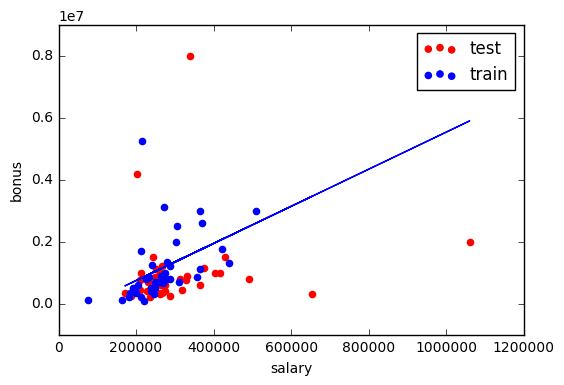

In [5]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
#fromfeature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../Documents/ud120-projects-master/final_project/final_project_dataset_modified.pkl","rb"))

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit( feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [1]:
#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [22]:
reg.coef_[0]

2.9847494591957067

In [23]:
reg.intercept_

195178.1615332925

In [8]:
reg.score(feature_train, target_train)

0.20615837539544968

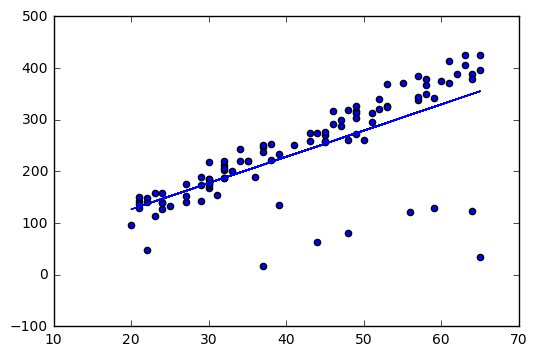

your regression object doesn't exist, or isn't name reg
outlierCleaner() is returning an empty list, no refitting to be done


In [28]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

#from outlier_cleaner import outlierCleaner
### load up some practice data with outliers in it
ages = pickle.load(open("../Documents/ud120-projects-master/outliers/practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load(open("../Documents/ud120-projects-master/outliers/practice_outliers_net_worths.pkl","rb"))

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit( ages_train,net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train,net_worths_train)
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
#     print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
#         print "   or else your regression object isn't named reg"
#         print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

In [27]:
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    x=0
    for x in range(0, len(ages)):
        new= ages[x], net_worths[x], predictions[x]-net_worths[x]
        cleaned_data.append(tuple(new))
    ### your code goes her
    cleaned_data=data[:81]
    
    return cleaned_data

In [22]:
reg.score(ages_train,net_worths_train)

0.3934027322544526

In [23]:
reg.coef_

array([[ 6.73676836]])